<a href="https://colab.research.google.com/github/Kumoichi/Machine-learning-classification-and-regression/blob/main/machine_learning_classification_and_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kenichi Shihota

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import csv
from google.colab import files
import io

In [ ]:
file = files.upload()

Saving data7.csv to data7.csv


In [ ]:
df = pd.read_csv( io.StringIO(file['data7.csv'].decode('latin-1')) )
df.describe()

,job,year,area,money,woman,problem,state,student
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,0.440000,26.010000,383.780000,0.120000,0.440000,25.370000,25.34000,12.880000
std,0.498888,16.341368,342.739132,0.326599,0.498888,16.347647,16.83864,9.934411
min,0.000000,-3.000000,-88.000000,0.000000,0.000000,-4.000000,1.00000,-4.000000
25%,0.000000,11.000000,121.750000,0.000000,0.000000,10.750000,10.00000,3.000000
50%,0.000000,32.000000,286.500000,0.000000,0.000000,31.000000,25.00000,13.000000
75%,1.000000,38.750000,598.000000,0.000000,1.000000,38.500000,39.75000,23.000000
max,1.000000,50.000000,1388.000000,1.000000,1.000000,50.000000,54.00000,31.000000


In [ ]:
df.head()

,job,year,area,money,woman,problem,state,student
0,1,47,239,0,1,47,10,15
1,0,5,11,0,0,4,39,0
2,1,41,610,0,1,40,25,23
3,1,32,520,0,1,32,19,23
4,1,35,210,0,1,34,13,11


1.Classification

In [ ]:
X = df.values
y = df['job'].values

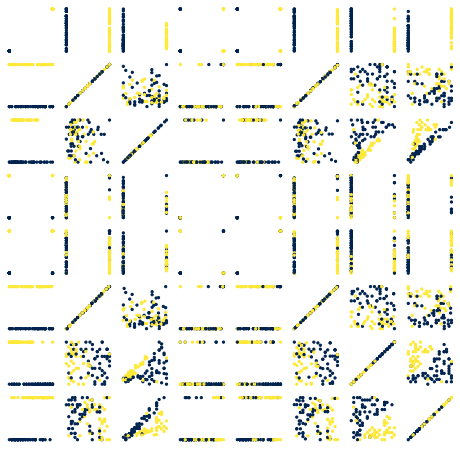

In [ ]:
# Scatter of each variable for each other variable
n = X.shape[1]
plt.figure(figsize=[8,8])

for i in range(n):
  for j in range(n):
    plt.subplot(n, n, i*n + j + 1)
    plt.scatter(X[:,i], X[:,j], c=y, s=5,cmap='cividis')
    plt.axis('off')

plt.show()

I'll use state and student.

In [ ]:
X = df[['state','student']].values
y = df['job'].values

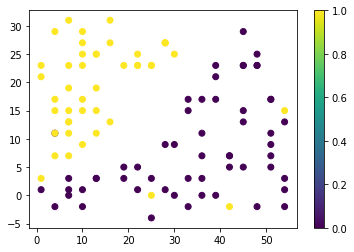

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.colorbar()

From the graph above it can say that when state has low value job tends to be 1.
When state has value around 30, if stuent has high value job tends to be 1, but if student has low value job tends to be 0.
When state has high value, job tends to be 0

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
scl.fit(X_train)

X_train = scl.transform(X_train)
X_test = scl.transform(X_test)

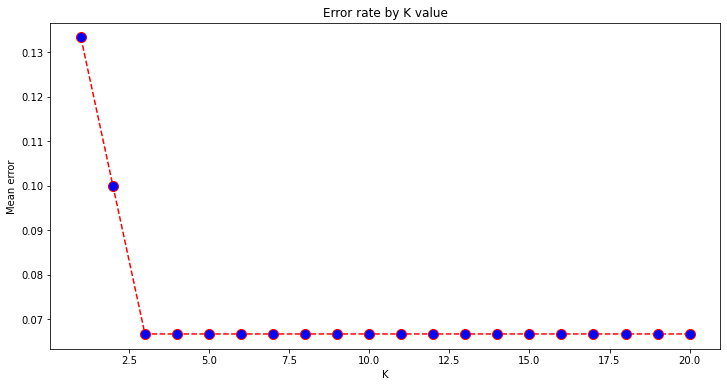

In [ ]:
error = []

for i in range(1,21):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error.append( 1-accuracy_score(y_test, pred_i) )

plt.figure(figsize=(12,6))
plt.plot(range(1,21), error, color='red', linestyle='dashed', 
         marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error rate by K value')
plt.xlabel('K')
plt.ylabel('Mean error')
plt.show()

This is for finding better distance

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 
est = KNeighborsClassifier(n_neighbors=3,p=1)
est.fit(X_train, y_train)
y_pred = est.predict(X_test)
print( accuracy_score(y_test, y_pred))

0.9333333333333333


from what I have found above, best distance was 3,4,5, and 6 in my case, so I'm putting 3. But most of the time a lot of distance were returning good result. It is because they are well classified.
Manhattan, Euclidean didn't change the result.

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[16,  0],
       [ 2, 12]])

15 of them are correctly predicted as 1, and none of them are wrong. 13 of them are correctly predicted as 0, and 2 of them are wrong in this case when I tested.

Let's put more features and see how job will be classified (except job because otherwise it will return 1.0)

In [ ]:
X = df.drop(['job'],axis=1).values
y = df['job'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
scl.fit(X_train)

X_train = scl.transform(X_train)
X_test = scl.transform(X_test)

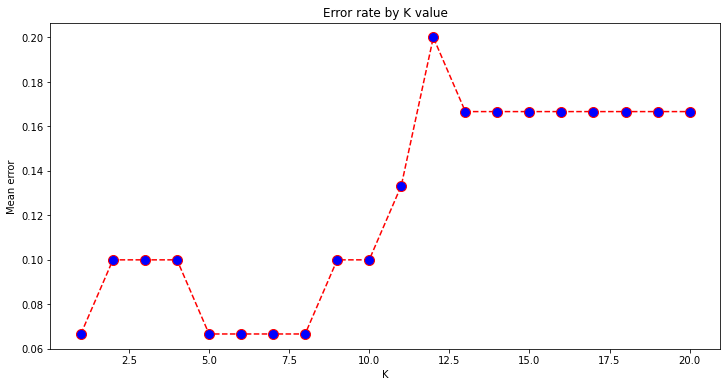

In [ ]:
error = []

for i in range(1,21):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error.append( 1-accuracy_score(y_test, pred_i) )

plt.figure(figsize=(12,6))
plt.plot(range(1,21), error, color='red', linestyle='dashed', 
         marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error rate by K value')
plt.xlabel('K')
plt.ylabel('Mean error')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#from what I have found above, best distance was 1 and 18 in my case, so I'm putting 1
# euclidean distance worked better in this case, so I'm using p=2
est = KNeighborsClassifier(n_neighbors=1, p=2)
est.fit(X_train, y_train)
y_pred = est.predict(X_test)
print( accuracy_score(y_test, y_pred))

0.9333333333333333


In [ ]:
#17 of them are correctly predicted as 1, and 1 of them are wrong. 10 of them are correctly predicted as 0, and 2 of them are wrong in this case when I tested.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[16,  0],
       [ 2, 12]])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
est = LogisticRegression()
est.fit(X_train, y_train)
y_pred = est.predict(X_test)
print( accuracy_score(y_test, y_pred))

0.9


This is where I'm trying Logistic regression, and it returns worse result than KNN.

So it almost returns the same result when I tried one feature and all features. It means other factors are not affecting classification that much.

2. Linear Regression

In [ ]:
X = df.values

In [ ]:
corrs = np.corrcoef(X,rowvar=False)

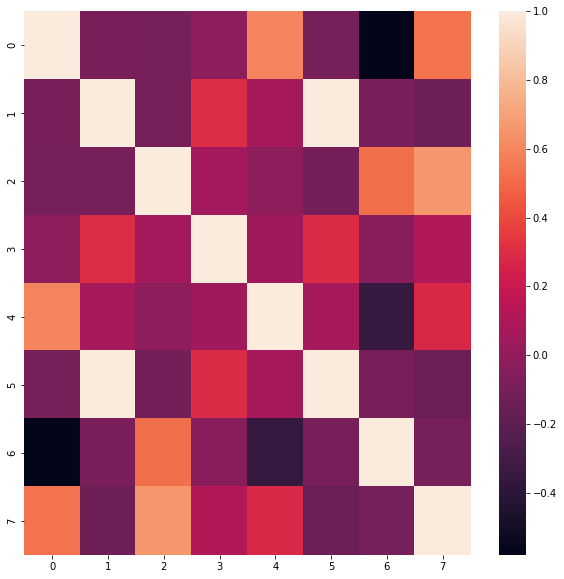

In [ ]:
from seaborn import heatmap
fig, ax = plt.subplots(figsize=(10,10))   
heatmap(corrs)

From the table above I can say that most of datas are not that correlated, 
but there is one section that has strong correlation. 1 and 5 which are year and problem. So I'll analyze the them 

In [ ]:
X = df[['year']].values
y = df['problem'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
est = LinearRegression()

est.fit(X_train,y_train)

y_pred = est.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.9989165498477285


As it was shown on heatmap it has strong correlation which is 99.9 percent.

I'll analyze other data too.

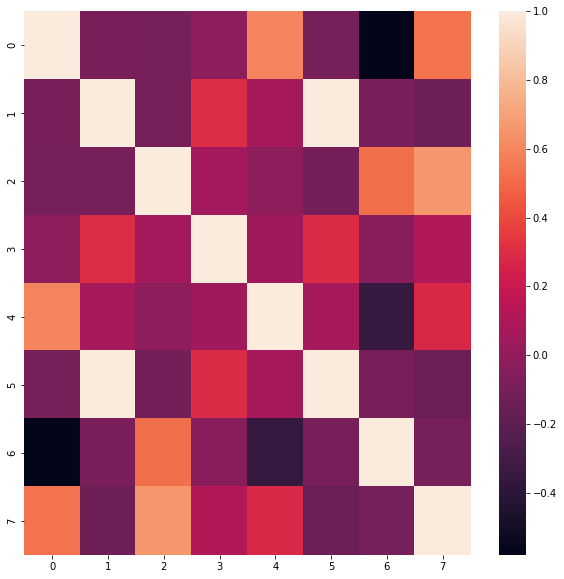

In [ ]:
X = df.values
from seaborn import heatmap
fig, ax = plt.subplots(figsize=(10,10))   
heatmap(corrs)

I notice that there is a point that are correlated, but not as strong as year and problem. They are 2 and 7 that are area and student. So I'll analyze them

In [ ]:
X = df[['area']].values
y = df['student'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
est = LinearRegression()

est.fit(X_train,y_train)

y_pred = est.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.43514231716051965


In [ ]:
est.coef_

array([6.16272048])

The result shows 42% when I tested. So it is not strongly correlated, but it has some correlation. And coefficient is positive, so when student data is high area data tends to be high, and when student are low, area tends to be low.  I'll try by adding all features and see the difference.(except student because it is the target.)

In [ ]:
X = df.drop(['student'],axis=1).values
y = df['student'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
est = LinearRegression()

est.fit(X_train,y_train)

y_pred = est.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.846558289740823


So by adding all other features it could predict better. 

In [ ]:
est.coef_

array([  4.57339537,  37.1718312 ,   8.91045093,   0.41685931,
        -1.14486067, -37.66329222,  -4.23463854])

From this coefficient it can be said job, year, area has positive affect on student.
Problem and state has negative affect on student which means when problem and state has high value students tends to have lower value.
And money and woman are not contributing that much. 